In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('insurance.csv')

# Check the data shape and information
print(f"Data shape: {df.shape}")
print(df.info())

Data shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


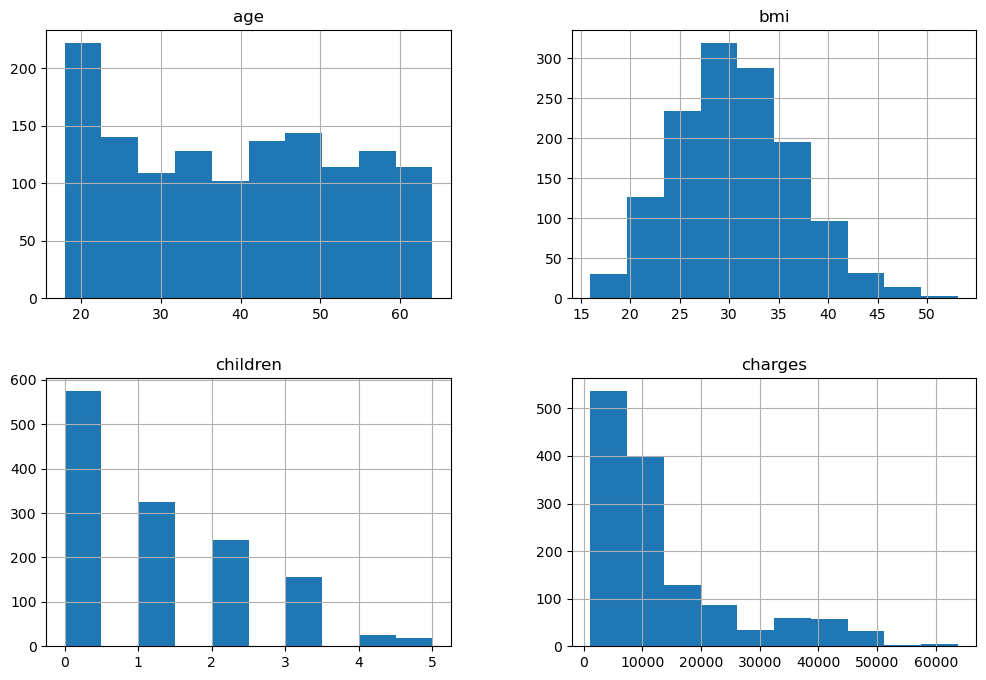

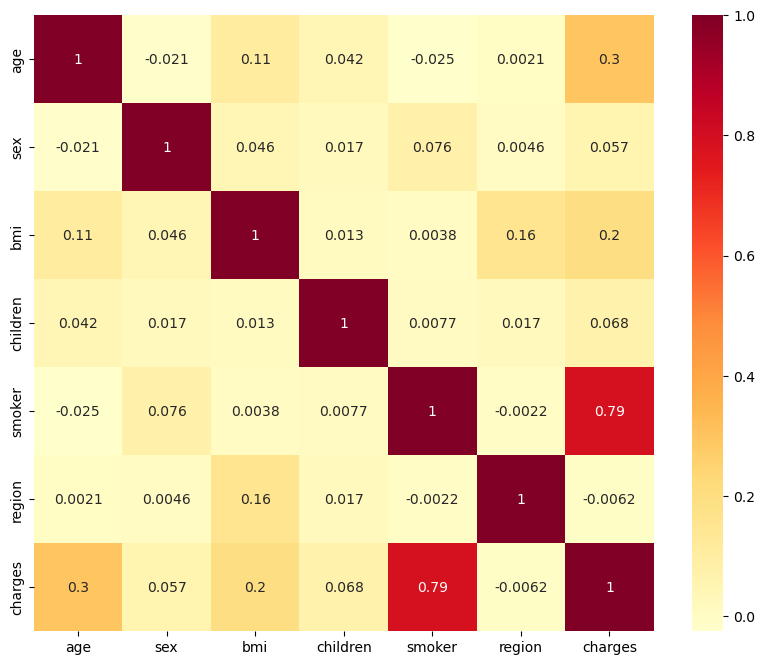

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('insurance.csv')

# Check for missing values
print(df.isnull().sum())

# Analyze the distribution of features
df.hist(figsize=(12, 8));
plt.show()

# Encode categorical variables to numeric
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd');
plt.show()

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv('insurance.csv')

# Encode categorical variables
X = df.drop('charges', axis=1)
y = df['charges']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('insurance.csv')
X = df.drop('charges', axis=1)
y = df['charges']

# Preprocess the data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define a pipeline with the preprocessor and models
model_pipelines = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(n_estimators=100, random_state=42))]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))]),
    'XGBoost': Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBRegressor(n_estimators=100, random_state=42))])
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate each model
for model_name, pipeline in model_pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{model_name}: MAE = {mean_absolute_error(y_test, y_pred):.2f}, RMSE = {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}, R2 = {r2_score(y_test, y_pred):.2f}")

Linear Regression: MAE = 4145.45, RMSE = 5812.10, R2 = 0.77
Random Forest: MAE = 2566.62, RMSE = 4610.87, R2 = 0.86
Gradient Boosting: MAE = 2473.62, RMSE = 4408.21, R2 = 0.87
XGBoost: MAE = 2903.06, RMSE = 4968.03, R2 = 0.83


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('insurance.csv')
X = df.drop('charges', axis=1)
y = df['charges']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
rf_tuned = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', random_state=42)
rf_tuned.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = rf_tuned.predict(X_test)
print(f"Tuned Random Forest: MAE = {mean_absolute_error(y_test, y_pred_tuned):.2f}, RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_tuned)):.2f}, R2 = {r2_score(y_test, y_pred_tuned):.2f}")

# Print the best parameters
print("Best parameters:", rf_tuned.best_params_)

Tuned Random Forest: MAE = 2538.26, RMSE = 4359.07, R2 = 0.87
Best parameters: {'regressor__n_estimators': 50, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 5}


Feature Importances:
cat__smoker_no           0.405612
num__bmi                 0.206274
cat__smoker_yes          0.200111
num__age                 0.140776
num__children            0.020698
cat__region_northeast    0.006166
cat__region_northwest    0.004644
cat__region_southeast    0.004195
cat__region_southwest    0.003942
cat__sex_male            0.003796
cat__sex_female          0.003785
dtype: float64


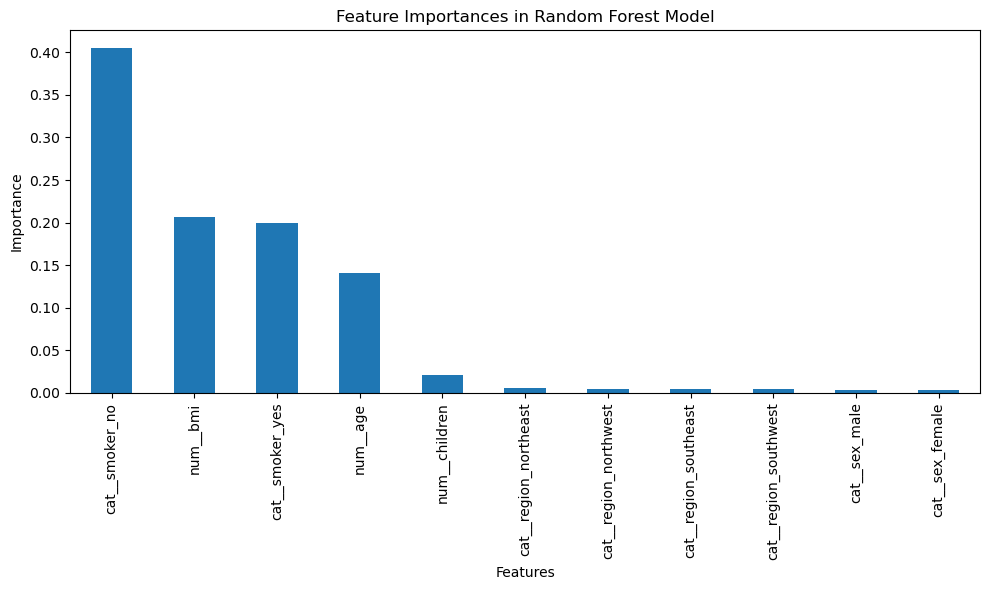

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('insurance.csv')
X = df.drop('charges', axis=1)
y = df['charges']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(
    rf_pipeline.named_steps['regressor'].feature_importances_,
    index=rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
).sort_values(ascending=False)

print("Feature Importances:")
print(feature_importances)

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Final Model Performance:
MAE: 2453.54
RMSE: 4414.27
R2 Score: 0.87


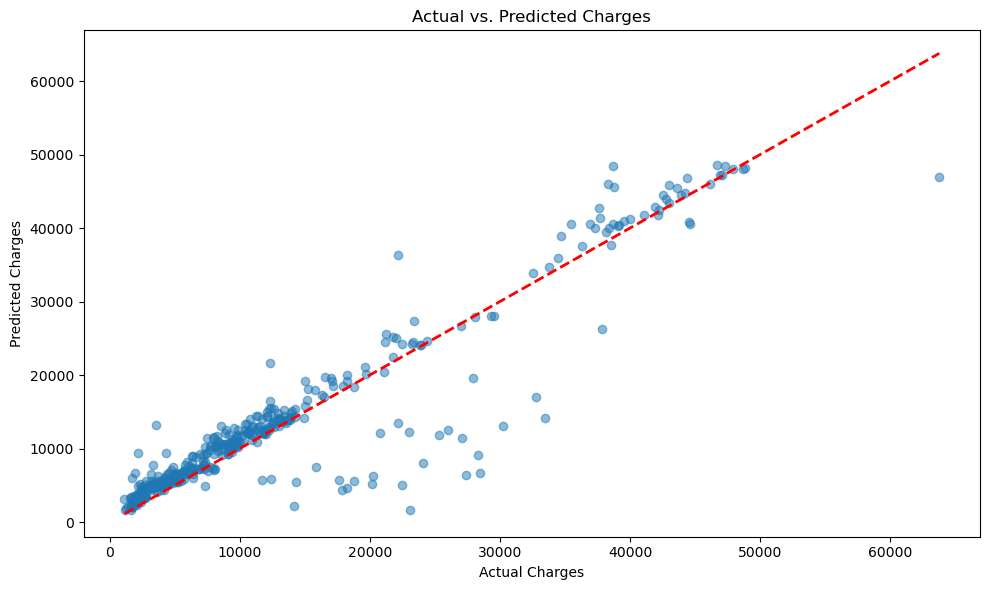

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('insurance.csv')
X = df.drop('charges', axis=1)
y = df['charges']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with the preprocessor and the Random Forest model
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_split=2, min_samples_leaf=1, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_final = rf_pipeline.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2 = r2_score(y_test, y_pred_final)

print(f"Final Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.tight_layout()
plt.show()